<a href="https://colab.research.google.com/github/himanshuchrist/AI-ML/blob/AML/Lab7_2348520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#loading the data
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [65]:
#label encoding all the binary data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['family_history_with_overweight']=le.fit_transform(data['family_history_with_overweight'])
data['FAVC']=le.fit_transform(data['FAVC'])
data['SMOKE']=le.fit_transform(data['SMOKE'])
data['SCC']=le.fit_transform(data['SCC'])

In [66]:
#standardizing all numeric data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=data[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']]
newX=sc.fit_transform(X)
scaleddata=pd.DataFrame(newX,columns=X.columns)
data[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']]=scaleddata
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,Sometimes,0,-0.013073,0,-1.188039,0.561997,no,Public_Transportation,Normal_Weight
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,Sometimes,1,1.618759,1,2.339750,-1.080625,Sometimes,Public_Transportation,Normal_Weight
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,Sometimes,0,-0.013073,0,1.163820,0.561997,Frequently,Public_Transportation,Normal_Weight
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,Sometimes,0,-0.013073,0,1.163820,-1.080625,Frequently,Walking,Overweight_Level_I
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,Sometimes,0,-0.013073,0,-1.188039,-1.080625,Sometimes,Public_Transportation,Overweight_Level_II


In [67]:
#dropping classified feature
data=data.drop(columns='NObeyesdad',axis=1)

In [68]:
#performing one hot encoding on categorical data
data = pd.get_dummies(data, columns = ['CAEC', 'CALC','MTRANS'])
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,0,-0.013073,...,0,0,0,0,1,0,0,0,1,0
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,1,1.618759,...,0,0,0,1,0,0,0,0,1,0
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,0,-0.013073,...,0,0,1,0,0,0,0,0,1,0
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,0,-0.013073,...,0,0,1,0,0,0,0,0,0,1
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,0,-0.013073,...,0,0,0,1,0,0,0,0,1,0


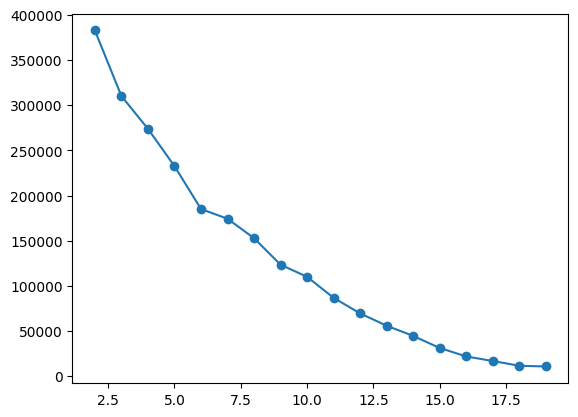

In [79]:
#applying k means with various clusters and plotting within cluster sum of square to choose the optimum no. of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for k in range(2,20):
  kmeans=KMeans(n_clusters=k,init='k-means++', n_init='auto')
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
  data[f'KMeans_{k}'] = kmeans.labels_
plt.plot(range(2,20),wcss,marker='o')

We see the optimal number of cluster lie between 5-7

In [80]:
#calculating silhouette_score
from sklearn.metrics import silhouette_score
for n_clusters in range(2,20):
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init='auto')
    preds = clusterer.fit_predict(data)
    centers = clusterer.cluster_centers_
    score = silhouette_score(data, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.1554238299067191)
For n_clusters = 3, silhouette score is 0.20061315975141594)
For n_clusters = 4, silhouette score is 0.24208357869655048)
For n_clusters = 5, silhouette score is 0.23587022589106987)
For n_clusters = 6, silhouette score is 0.3227790579099064)
For n_clusters = 7, silhouette score is 0.30821568354170986)
For n_clusters = 8, silhouette score is 0.40021780830568615)
For n_clusters = 9, silhouette score is 0.4378196119367004)
For n_clusters = 10, silhouette score is 0.48997658973235836)
For n_clusters = 11, silhouette score is 0.5255310702332863)
For n_clusters = 12, silhouette score is 0.5920759581647947)
For n_clusters = 13, silhouette score is 0.6433317468567528)
For n_clusters = 14, silhouette score is 0.6559484842373043)
For n_clusters = 15, silhouette score is 0.6924199249365088)
For n_clusters = 16, silhouette score is 0.7225733428304952)
For n_clusters = 17, silhouette score is 0.753238104614489)
For n_clusters = 18, silhou

In [81]:
#records classification
data['KMeans_7'].value_counts()

1    668
4    331
3    298
2    264
5    243
6    185
0    122
Name: KMeans_7, dtype: int64

<Axes: xlabel='Weight', ylabel='Height'>

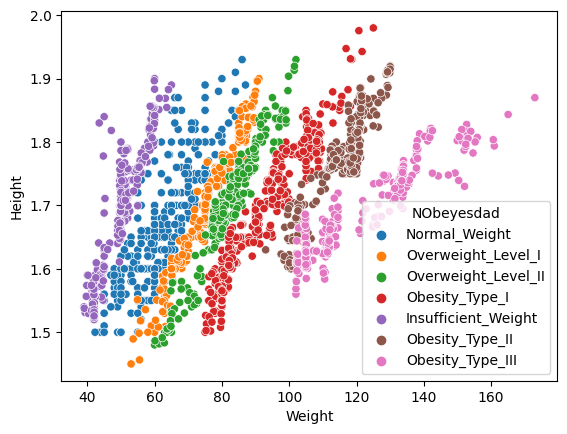

In [63]:
#expected outcome with 7 clusters
import seaborn as sns
sns.scatterplot(x=data['Weight'],y=data['Height'],hue=data['NObeyesdad'])

<Axes: xlabel='Weight', ylabel='Height'>

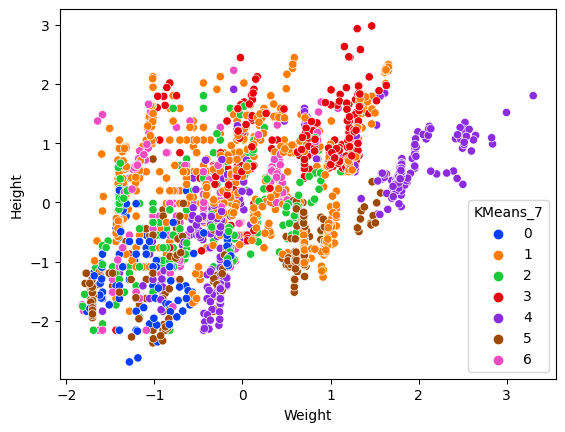

In [82]:
#plotting with optimal number of clusters based on model
sns.scatterplot(x=data['Weight'],y=data['Height'],hue=data['KMeans_7'], palette='bright')